# Bike Sharing Assignment



## Problem Statement:
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for   a price or free.
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona       pandemic.
- The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a       mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy     restores to a healthy state. 
- BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends       across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the         situation gets better all around and stand out from other service providers and make huge profits.
- Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands   Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily   bike demands across the American market based on some factors.

## Business Goal:
 - You are required to model the demand for shared bikes with the available independent variables. It will be used by the          management to understand how exactly the demands vary with different features. They can accordingly manipulate the business    strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for              management  to understand the demand dynamics of a new market. 

 

## 1. Importing required libraries and warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## 2. Reading and understanding data

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [7]:
#Investigating data and data type categorical columns - season
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# Investigating data and data type categorical columns - weathersit
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [9]:
# Investigating data and data type categorical columns - mnth
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [10]:
# Investigating data and data type categorical columns - weekday
bike.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

## Data Insights :
- The given dataset has 730 rowns and 16 columns.
- Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.
- No null/missing values found in the dataset
- Some columns that are categorical in nature, but in integer/float type.

## 3. Dropping Irrelevant Data

In [11]:
# instant columns contains index values only.
bike.drop(['instant'],axis=1,inplace=True)

In [12]:
# we already have yr and month columns, so dteday in not required
bike.drop(['dteday'],axis=1,inplace=True)

In [13]:
#target variable is cnt, we can delete casual and registered columns
bike.drop(['casual','registered'],axis=1,inplace=True)

## 4. EDA & Data Visualising the Data

In [14]:
# Modifying the categorical variable in mnth
bike["mnth"] = bike["mnth"].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                                   7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike["mnth"].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [15]:
# Modifying the categorical variable in season 
bike["season"] = bike["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
# Modifying the categorical variable in yr
bike["yr"] = bike["yr"].map({0:'2018', 1:'2019'})
bike['yr'] = bike['yr'].astype('int64')
bike["yr"].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [17]:
# Modifying the categorical variable in weekday 
bike["weekday"] = bike["weekday"].map({1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday', 7:'sunday'})
bike["weekday"].value_counts()

monday       105
tuesday      105
wednesday    104
thursday     104
friday       104
saturday     104
Name: weekday, dtype: int64

In [18]:
# Modifying the categorical variable in weathersit 
bike["weathersit"] = bike["weathersit"].map({1:'Clear', 2:'Mist/Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})
bike["weathersit"].value_counts()

Clear              463
Mist/Cloudy        246
Light Rain/Snow     21
Name: weathersit, dtype: int64

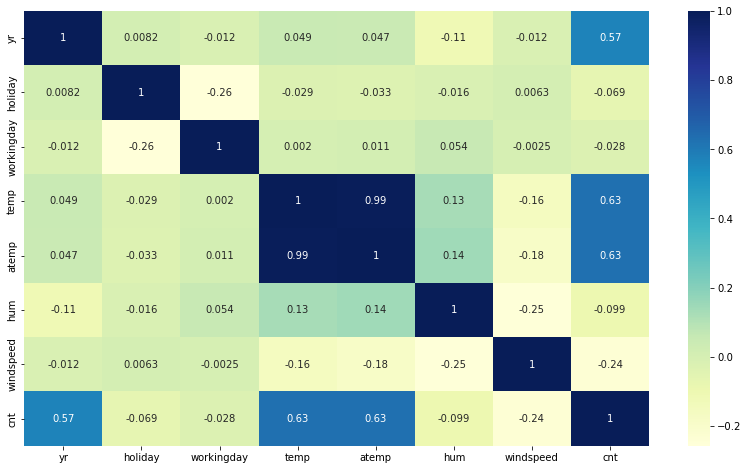

In [19]:
#Heatmap
plt.figure(figsize = (14,8))
sns.heatmap(bike.corr(), annot=True, cmap="YlGnBu")
plt.show()

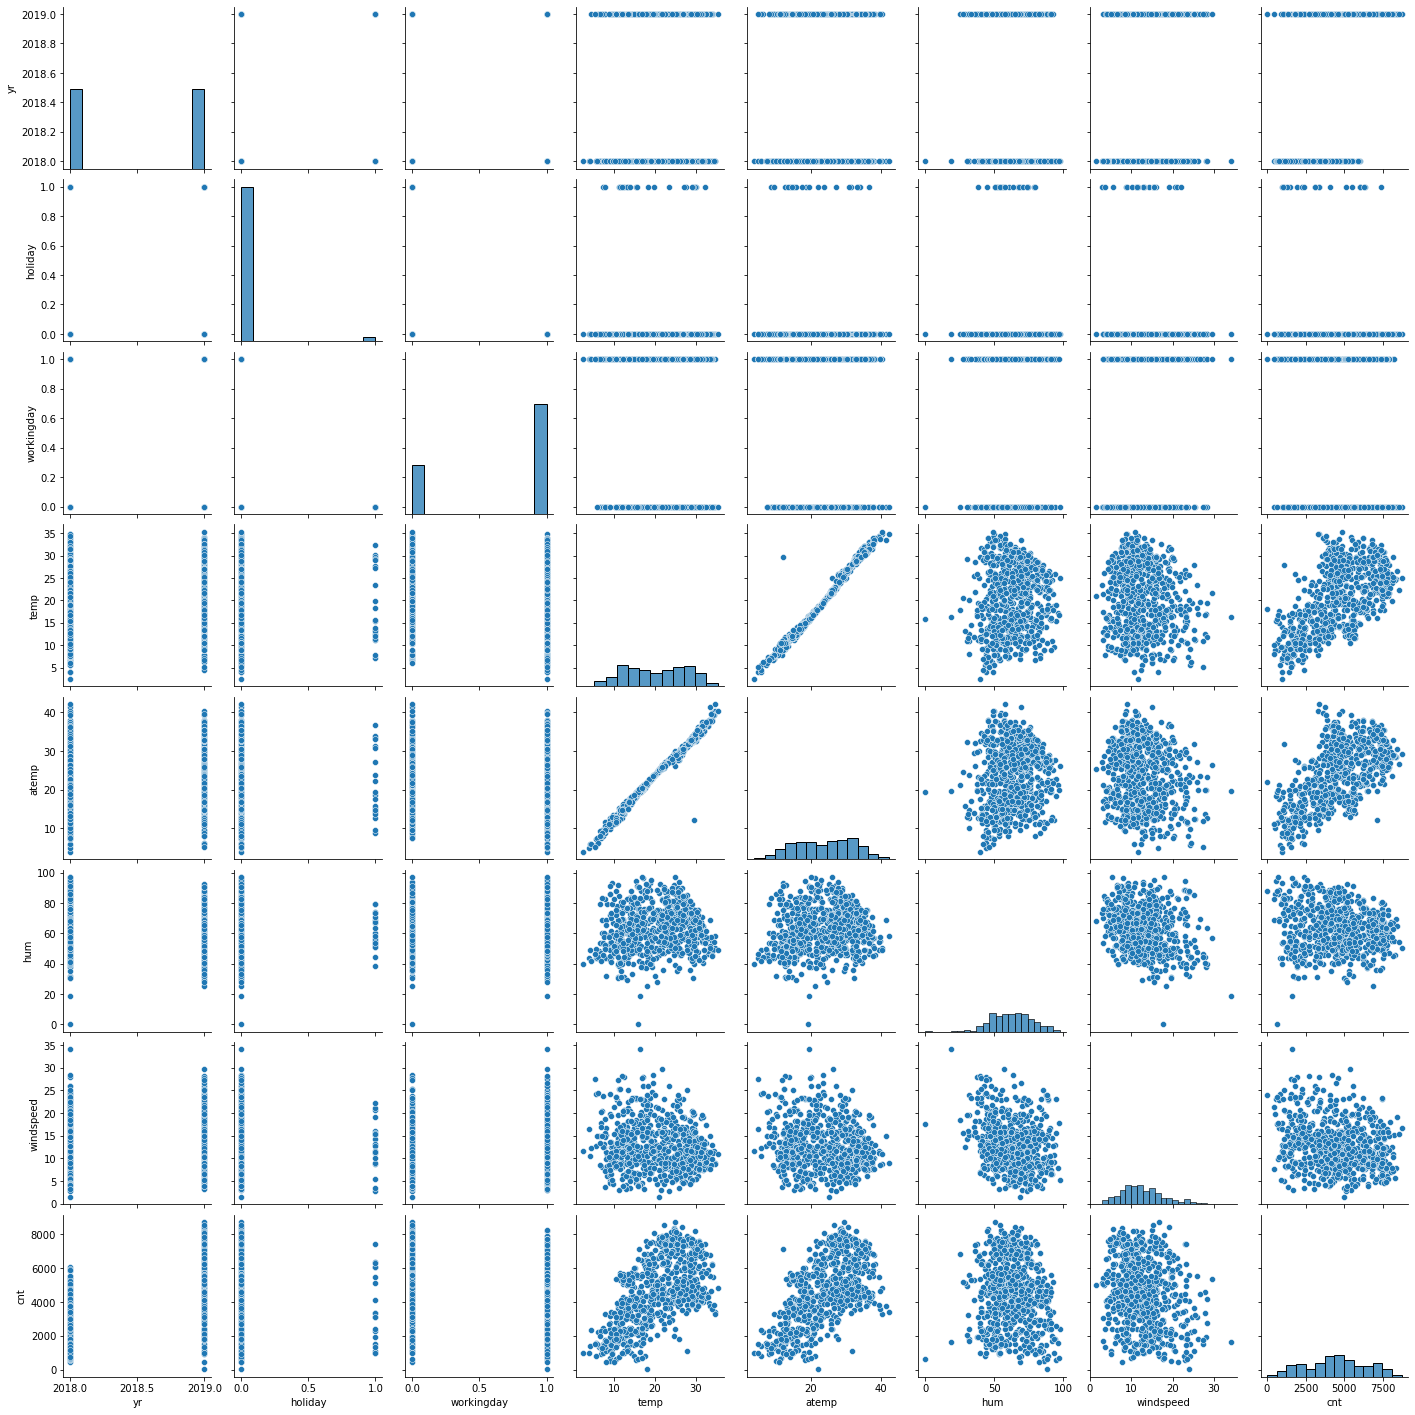

In [20]:
# Pairplot of numerical variables

# Numeric variable
sns.pairplot(bike)
plt.show()

### Insights:
- There is a correlation of 0.63 between cnt-temp and cnt-atemp
- There is a correlation of 0.99 between temp and atemp

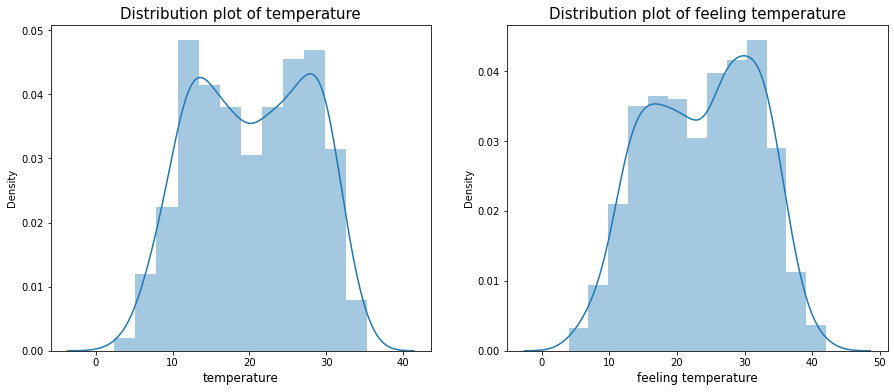

In [21]:
# Visualizing distribution of numerical variables - temperature & feeling temperature
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax1 = sns.distplot(bike["temp"], ax=ax1)
ax1.set_xlabel("temperature", fontsize=12)
ax1.set_title("Distribution plot of temperature", fontsize=15)
ax2 = sns.distplot(bike["atemp"], ax=ax2)
ax2.set_xlabel("feeling temperature", fontsize=12)
ax2.set_title("Distribution plot of feeling temperature", fontsize=15)
plt.show()

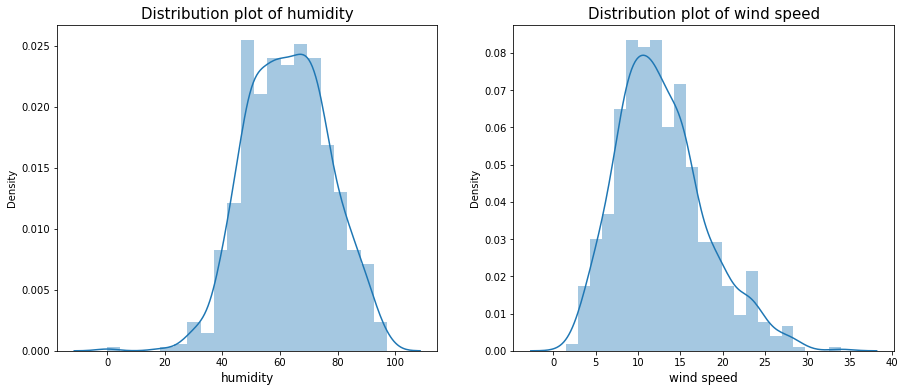

In [22]:
# Visualizing distribution of numerical variables - humidity & wind speed
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax1 = sns.distplot(bike["hum"], ax=ax1)
ax1.set_xlabel("humidity", fontsize=12)
ax1.set_title("Distribution plot of humidity", fontsize=15)
ax2 = sns.distplot(bike["windspeed"], ax=ax2)
ax2.set_xlabel("wind speed", fontsize=12)
ax2.set_title("Distribution plot of wind speed", fontsize=15)
plt.show()

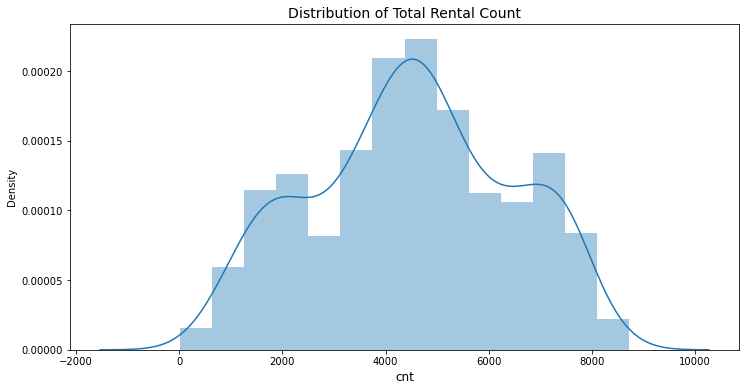

In [23]:
# Visualizing distribution of target numerical variables - count of rentals
plt.figure(figsize=(12,6))
sns.distplot(bike["cnt"])
plt.xlabel("cnt", fontsize=12)
plt.title("Distribution of Total Rental Count", fontsize=14)
plt.show()

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

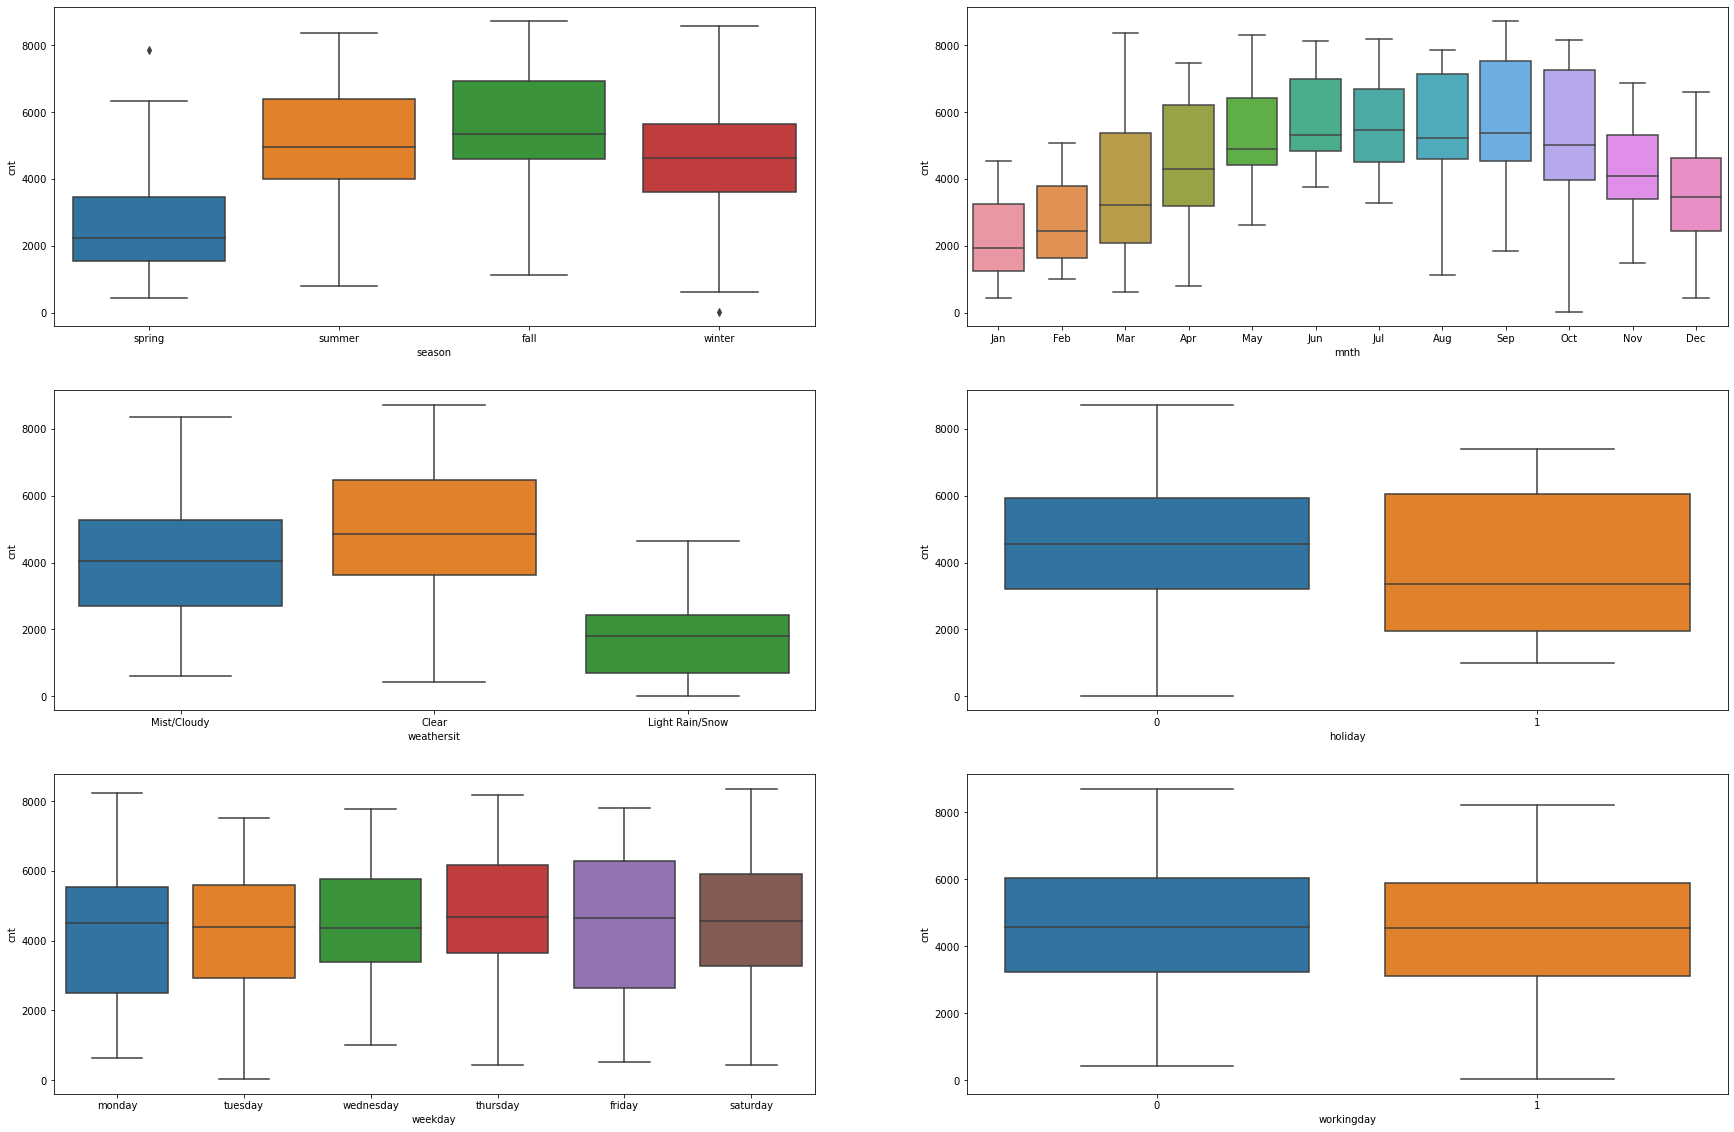

In [24]:
# Boxplot of categorical variables

plt.figure(figsize=(30, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)


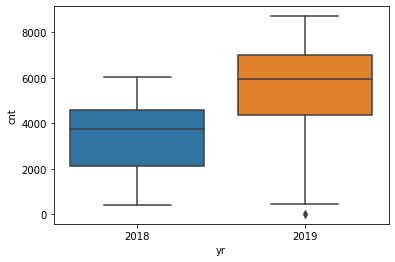

In [25]:
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()




### Insights:
- season: Most of the bike booking were happening in summer and fall with a median of over 5000 booking. This indicates,           season can be a good predictor for the dependent variable.

- mnth: Most bike booking were happening in the months May, June, July, Aug, Sep & Oct with a median of over 4000 booking per     month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Most of the bike booking were happening during clear weather with a median of close to 5000 booking followed by     cloudy with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good           predictor for the dependent variable.

- holiday: Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor     for the dependent variable for increasing bookings.

- weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable   can have some or no influence towards the predictor.

- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the       period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

- yr: 2019 is clearly a better year the bike booking. This indicates it could be useful.

## 5. Creating dummy variables

In [26]:
# Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
# Convert to 'object' data type

bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     626 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.5 KB


In [28]:
# creating dummy variables for 'mnth', 'weekday', 'season' & 'weathersit'
# dropping 1st dummy variable for each
# dropping the original columns

bike=pd.get_dummies(data=bike,drop_first=True)

bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,2018,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Splitting the data

In [29]:
scaler = MinMaxScaler()

In [30]:
# Splitting X and y for model
X = bike.drop("cnt", axis=1).copy()
y = bike.cnt.copy()

In [31]:
# Using sklearn package for data split
# Train:Test in 70:30 ratio
# We need to specify 'random_state' so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,2019,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
X_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,0.243137,0.245098,0.24902,...,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,0.429398,0.430568,0.43287,...,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.169124,0.475223
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


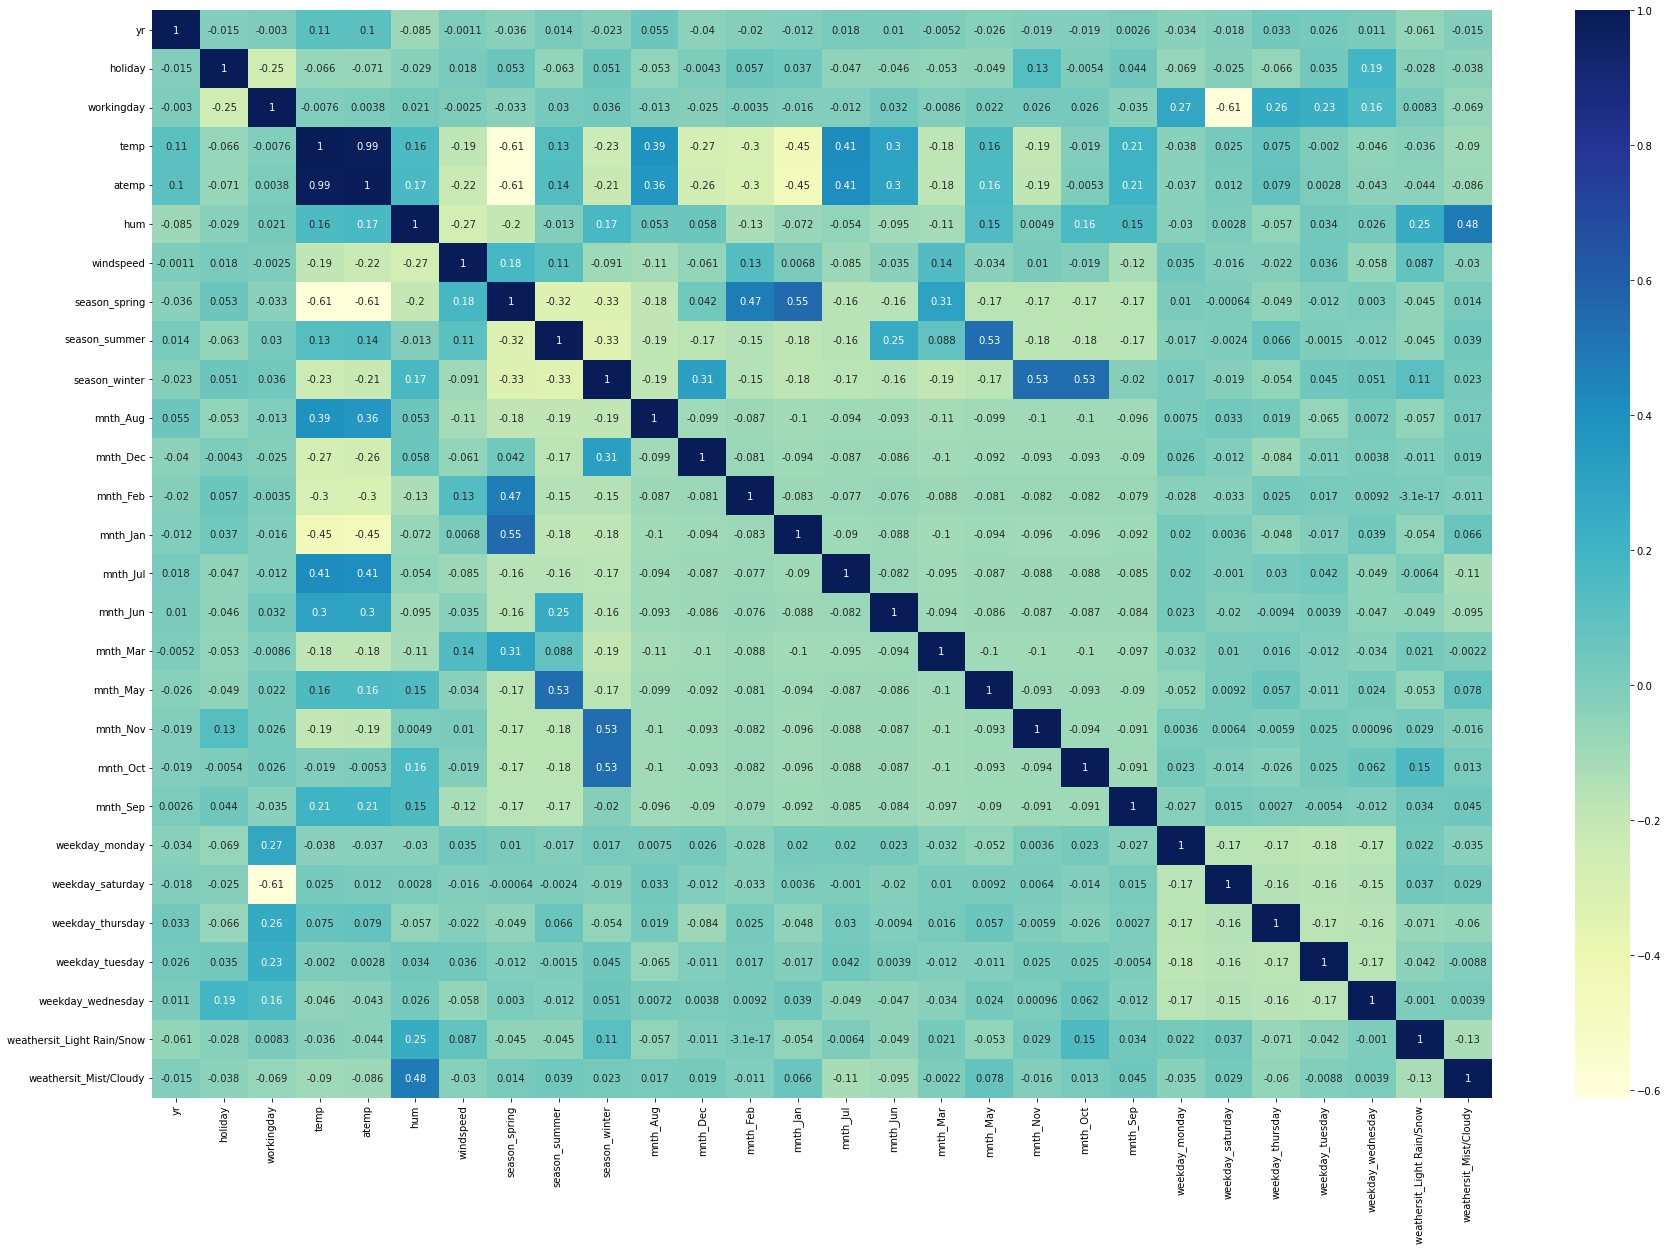

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Scaling

In [35]:
# Applying MinMaxScaler
scaler = MinMaxScaler()
num_vars = ["temp", "hum", "windspeed"]
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
653,2019,0,1,0.509887,23.0423,0.575354,0.300794,0,0,1,...,0,1,0,0,0,0,0,1,0,0
576,2019,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,2019,0,0,0.442393,20.6746,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,2019,0,1,0.245101,11.5850,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,2019,0,0,0.395666,18.8752,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.711765,0.537262,23.493909,0.650369,0.320768,0.243137,0.245098,0.24902,...,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,8.090038,0.145882,0.169797,0.429398,0.430568,0.43287,...,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.169124,0.475223
min,2018.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.540519,24.020400,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7. Linear Regression using Stats Models API

In [37]:
# Method for Building Model
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [38]:
# Method Checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [39]:
# Intial Model with all features
X_train_1 = build_model(X_train, y_train)
checkVIF(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.94
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          5.23e-179
Time:                        16:33:56   Log-Likelihood:                -4102.2
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     481   BIC:                             8385.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,17232633.18
4,temp,66.99
5,atemp,55.87
8,season_spring,10.81
10,season_winter,9.51
9,season_summer,8.31
19,mnth_Nov,6.79
20,mnth_Oct,6.59
11,mnth_Aug,6.55
14,mnth_Jan,5.90


- Dropping Features one by one where p-value > 0.05 and VIF > 5

In [40]:
# Dropping column season_spring and verifying the model with p-value and VIF
X = X_train.drop('season_spring', axis=1)
X_train_2 = build_model(X, y_train)
checkVIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.45e-179
Time:                        16:33:56   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     482   BIC:                             8381.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,17222650.79
4,temp,66.60
5,atemp,55.79
18,mnth_Nov,6.79
19,mnth_Oct,6.59
9,season_winter,6.08
11,mnth_Dec,5.63
10,mnth_Aug,5.27
13,mnth_Jan,5.22
8,season_summer,4.74


In [41]:
# Dropping column mnth_Nov and verifying the model with p-value and VIF
X = X.drop('mnth_Nov', axis=1)
X_train_3 = build_model(X, y_train)
checkVIF(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.1
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.60e-180
Time:                        16:33:56   Log-Likelihood:                -4103.9
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     483   BIC:                             8376.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,17216391.16
4,temp,66.37
5,atemp,55.79
10,mnth_Aug,4.13
14,mnth_Jul,3.88
9,season_winter,3.84
13,mnth_Jan,3.31
8,season_summer,3.27
3,workingday,2.92
19,mnth_Sep,2.63


In [42]:
# Dropping column mnth_Nov and verifying the model with p-value and VIF
X = X.drop('atemp', axis=1)
X_train_3 = build_model(X, y_train)
checkVIF(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.54e-181
Time:                        16:33:56   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     484   BIC:                             8370.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,17202145.04
4,temp,6.79
9,mnth_Aug,3.99
8,season_winter,3.84
13,mnth_Jul,3.82
12,mnth_Jan,3.31
7,season_summer,3.26
3,workingday,2.92
18,mnth_Sep,2.60
14,mnth_Jun,2.51


In [43]:
# Dropping column mnth_Jul and verifying the model with p-value and VIF
X = X.drop('mnth_Jul', axis=1)
X_train_4 = build_model(X, y_train)
checkVIF(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.35e-182
Time:                        16:33:56   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     485   BIC:                             8364.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,17044527.63
4,temp,4.39
8,season_winter,3.32
12,mnth_Jan,3.22
3,workingday,2.91
7,season_summer,2.60
11,mnth_Feb,2.33
5,hum,2.00
14,mnth_Mar,1.83
15,mnth_May,1.76


In [44]:
# Dropping column mnth_Mar and verifying the model with p-value and VIF
X = X.drop('mnth_Mar', axis=1)
X_train_5 = build_model(X, y_train)
checkVIF(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.18e-183
Time:                        16:33:56   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     486   BIC:                             8358.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16997672.72
4,temp,3.43
3,workingday,2.91
8,season_winter,2.58
7,season_summer,2.46
12,mnth_Jan,2.25
5,hum,1.99
17,weekday_monday,1.74
20,weekday_tuesday,1.74
19,weekday_thursday,1.74


In [45]:
# Dropping column mnth_Jun and verifying the model with p-value and VIF
X = X.drop('mnth_Jun', axis=1)
X_train_6 = build_model(X, y_train)
checkVIF(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.59e-184
Time:                        16:33:57   Log-Likelihood:                -4104.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     487   BIC:                             8352.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16931439.43
3,workingday,2.90
4,temp,2.84
8,season_winter,2.57
7,season_summer,2.25
12,mnth_Jan,2.19
5,hum,1.97
19,weekday_tuesday,1.74
16,weekday_monday,1.74
18,weekday_thursday,1.73


In [46]:
# Dropping column workingday and verifying the model with p-value and VIF
X = X.drop('workingday', axis=1)
X_train_7 = build_model(X, y_train)
checkVIF(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          3.08e-185
Time:                        16:33:57   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     488   BIC:                             8346.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16911570.06
3,temp,2.84
7,season_winter,2.57
6,season_summer,2.25
11,mnth_Jan,2.19
4,hum,1.97
10,mnth_Feb,1.70
13,mnth_Oct,1.67
21,weathersit_Mist/Cloudy,1.58
9,mnth_Dec,1.51


In [47]:
# Dropping column mnth_May and verifying the model with p-value and VIF
X = X.drop('mnth_May', axis=1)
X_train_8 = build_model(X, y_train)
checkVIF(X_train_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          5.36e-186
Time:                        16:33:57   Log-Likelihood:                -4105.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     489   BIC:                             8342.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16881652.11
3,temp,2.80
7,season_winter,2.57
11,mnth_Jan,2.18
4,hum,1.92
6,season_summer,1.83
10,mnth_Feb,1.69
12,mnth_Oct,1.67
20,weathersit_Mist/Cloudy,1.58
9,mnth_Dec,1.51


In [48]:
# Dropping column weekday_thursday and verifying the model with p-value and VIF
X = X.drop('weekday_thursday', axis=1)
X_train_9 = build_model(X, y_train)
checkVIF(X_train_9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          4.41e-187
Time:                        16:33:57   Log-Likelihood:                -4105.4
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     490   BIC:                             8336.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16875621.51
3,temp,2.80
7,season_winter,2.56
11,mnth_Jan,2.18
4,hum,1.92
6,season_summer,1.82
10,mnth_Feb,1.69
12,mnth_Oct,1.67
19,weathersit_Mist/Cloudy,1.57
9,mnth_Dec,1.51


In [49]:
# Dropping column weekday_saturday and verifying the model with p-value and VIF
X = X.drop('weekday_saturday', axis=1)
X_train_10 = build_model(X, y_train)
checkVIF(X_train_10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          3.56e-188
Time:                        16:33:57   Log-Likelihood:                -4105.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16869512.50
3,temp,2.80
7,season_winter,2.56
11,mnth_Jan,2.18
4,hum,1.92
6,season_summer,1.82
10,mnth_Feb,1.68
12,mnth_Oct,1.67
18,weathersit_Mist/Cloudy,1.57
9,mnth_Dec,1.51


In [50]:
# Dropping column mnth_Dec and verifying the model with p-value and VIF
X = X.drop('mnth_Dec', axis=1)
X_train_11 = build_model(X, y_train)
checkVIF(X_train_11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          4.45e-189
Time:                        16:33:57   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     492   BIC:                             8324.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16866683.10
7,season_winter,2.53
3,temp,2.50
10,mnth_Jan,1.97
4,hum,1.89
6,season_summer,1.71
9,mnth_Feb,1.57
17,weathersit_Mist/Cloudy,1.56
11,mnth_Oct,1.51
8,mnth_Aug,1.48


In [51]:
# Dropping column weekday_wednesday and verifying the model with p-value and VIF
X = X.drop('weekday_wednesday', axis=1)
X_train_12 = build_model(X, y_train)
checkVIF(X_train_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          6.14e-190
Time:                        16:33:57   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     493   BIC:                             8319.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16859683.38
7,season_winter,2.53
3,temp,2.50
10,mnth_Jan,1.97
4,hum,1.89
6,season_summer,1.71
9,mnth_Feb,1.56
16,weathersit_Mist/Cloudy,1.56
11,mnth_Oct,1.51
8,mnth_Aug,1.48


In [52]:
# Dropping column mnth_Feb and verifying the model with p-value and VIF
X = X.drop('mnth_Feb', axis=1)
X_train_13 = build_model(X, y_train)
checkVIF(X_train_13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.13e-190
Time:                        16:33:57   Log-Likelihood:                -4107.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     494   BIC:                             8315.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,16830840.04
7,season_winter,2.04
3,temp,2.02
4,hum,1.89
9,mnth_Jan,1.56
15,weathersit_Mist/Cloudy,1.56
10,mnth_Oct,1.50
6,season_summer,1.48
8,mnth_Aug,1.46
11,mnth_Sep,1.25


- All features p-value is less than 0.05 and VIF is also less than 5 almost equal to 2.
- R-squared and Adj. R-squared is 84.8% and 84.3% which is also very good indicator for a model

#### Residual Analysis of the model

In [53]:
# Predicting y values based on the model for training set
lr_model = sm.OLS(y_train, X_train_13).fit()
y_train_pred = lr_model.predict(X_train_13)
y_train_pred.head()

653    6654.127464
576    6383.519338
426    4396.297660
728    3333.906682
482    5346.516969
dtype: float64

Text(0.5, 0, 'Errors')

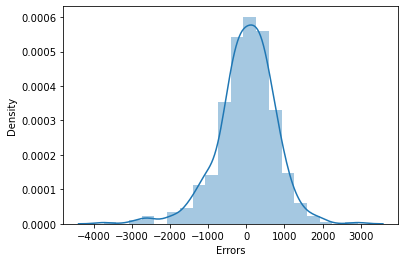

In [54]:
# Plotting the residuals for training set
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.xlabel("Errors", fontsize=10)

#### Inference :
- Error terms for training set are normally distributed.
- Also the mean is near to `0`
- This means that the model has a constant variance i.e. Homoscedasticity.

### 8. Evaluating Test Set

In [55]:
# Numerical values Transformation in test set
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,2018,1,0,0.831783,33.27085,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,2019,0,1,0.901354,36.04875,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,2018,0,0,0.511964,22.85230,0.837699,0.334206,0,0,1,...,0,1,0,0,1,0,0,0,0,1
221,2018,0,1,0.881625,34.24915,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,2018,0,0,0.817246,32.19710,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
# Adding constant in test set
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,2018,1,0,0.831783,33.27085,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,2019,0,1,0.901354,36.04875,0.610133,0.153728,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,2018,0,0,0.511964,22.85230,0.837699,0.334206,0,0,...,0,1,0,0,1,0,0,0,0,1
221,1.0,2018,0,1,0.881625,34.24915,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,2018,0,0,0.817246,32.19710,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,0,0,0


In [57]:
# Dropping irrelevant columns in test as per train set model
X_test_sm = X_test_sm.drop(["season_spring","mnth_Nov", "atemp", "mnth_Mar","mnth_Jul","mnth_Jun","workingday","mnth_May",
                            "weekday_thursday","weekday_saturday","mnth_Dec","weekday_wednesday","mnth_Feb"], axis=1)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_Aug,mnth_Jan,mnth_Oct,mnth_Sep,weekday_monday,weekday_tuesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,2018,1,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,0,0,1
535,1.0,2019,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0,0,0
299,1.0,2018,0,0.511964,0.837699,0.334206,0,1,0,0,1,0,0,0,0,1
221,1.0,2018,0,0.881625,0.437098,0.339570,0,0,1,0,0,0,0,0,0,0
152,1.0,2018,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0,0,0


In [58]:
# Predicting target variable in test set
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

184    3522.742764
535    7958.845611
299    3735.491464
221    5458.488835
152    5401.316386
dtype: float64

In [59]:
# Output of r2_score of Train and Test set
print("r2_score for Train Set : " , r2_score(y_true=y_train, y_pred=y_train_pred))
print("r2_score for Test Set  : " ,r2_score(y_true=y_test, y_pred=y_test_pred))

r2_score for Train Set :  0.8476016153073017
r2_score for Test Set  :  0.8131599335389589


### 9. Linear Regression using sklearn

In [60]:
# Fitting the train set 
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [61]:
# Coefficient of each column in training set
coeff_bike = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff_bike

,Coefficient
yr,2009.884966
holiday,-818.214292
workingday,-104.415259
temp,3502.784937
atemp,10.268060
hum,-1362.546873
windspeed,-1579.778823
season_spring,-380.776630
season_summer,363.652364
season_winter,954.562227


In [62]:
print(regressor.intercept_)

-4052978.114777828


In [63]:
# Predicting y values for test set
y_pred = regressor.predict(X_test)
bike1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
bike1

,Actual,Predicted
184,6043,3478.622573
535,6211,7748.331249
299,2659,3760.967654
221,4780,5367.418891
152,4968,5201.855277
...,...,...
400,2947,3059.625991
702,6606,5936.730081
127,4333,4539.379507
640,7572,7134.102673


In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 579.0662663256427
Mean Squared Error: 612453.2674829048
Root Mean Squared Error: 782.593935245415


In [65]:
# R-squared and Adj. R-squared for Train set
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R-squared      : ",r_squared)
print("Adj. R-Squared : ", adjusted_r_squared)

R-squared      :  0.8507801954108536
Adj. R-Squared :  0.8420938034597183


In [66]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R-squared      : ",r_squared)
print("Adj. R-Squared : ", adjusted_r_squared)

R-squared      :  0.8293217273212887
Adj. R-Squared :  0.8041691397686366


## Model Outcome Summary

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

## Analysing the above model, the comapany should focus on the following features

Company should focus on expanding business during Spring. . Company should focus on expanding business during September. . Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019. . There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

## Significant variables to predict the demand for shared bikes

Holiday . temp . hum . windspeed . Season(Spring,Summer,Winter) . months(January, July, September, November, December). 
Year (2019). Monday and Tuesday . weathersit(good,moderate)